In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


X_ = np.loadtxt("/kaggle/input/iot-sensordata/Xdados.txt") # X have 14.400rows x 52 sensors

X=pd.DataFrame(X_, columns=['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27','s28','s29','s30','s31','s32','s33','s34','s35','s36','s37','s38','s39','s40','s41','s42','s43','s44','s45','s46','s47','s48','s49','s50','s51','s52']) 
print(X.shape)
X.to_csv('Xdados.csv',index=False)
X.head() 


(14400, 52)


,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52
0,18.61,19.04,18.82,19.18,18.76,18.75,18.17,18.39,18.37,17.02,...,16.93,16.99,16.76,16.72,16.13,15.32,16.44,15.81,15.1,14.94
1,18.60,19.04,18.80,19.22,18.77,18.75,18.17,18.39,18.39,17.01,...,16.94,16.98,16.76,16.70,16.15,15.32,16.44,15.80,15.1,14.93
2,18.59,19.03,18.79,19.26,18.77,18.75,18.17,18.38,18.38,17.01,...,16.94,16.95,16.75,16.70,16.15,15.32,16.43,15.79,15.1,14.92
3,18.58,19.03,18.78,19.30,18.77,18.75,18.16,18.38,18.38,17.01,...,16.92,16.96,16.74,16.69,16.15,15.32,16.42,15.79,15.1,14.91
4,18.57,19.03,18.77,19.29,18.77,18.75,18.16,18.38,18.37,17.01,...,16.93,16.97,16.73,16.68,16.12,15.32,16.42,15.78,15.1,14.90


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [5]:
names = X.columns[13]

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_data)

In [7]:
scaled_data

array([[-1.38628352, -1.45578614, -1.42155828, ..., -1.8719126 ,
        -1.82155629, -1.763413  ],
       [-1.39033902, -1.45578614, -1.43061286, ..., -1.87569394,
        -1.82155629, -1.76698283],
       [-1.39439452, -1.46099587, -1.43514015, ..., -1.87947528,
        -1.82155629, -1.77055265],
       ...,
       [-0.46163019, -0.34611573, -0.40744538, ...,  0.04900746,
        -0.10017768, -0.22124772],
       [-0.46163019, -0.34611573, -0.40744538, ...,  0.04522612,
        -0.10017768, -0.21767789],
       [-0.45757469, -0.34611573, -0.40291809, ...,  0.04144479,
        -0.09656134, -0.21767789]])

In [8]:
pca_data

array([[10.19515503, -0.90693701],
       [10.20067934, -0.90326069],
       [10.21317055, -0.90480854],
       ...,
       [ 3.4838941 ,  1.43816238],
       [ 3.4878899 ,  1.43382648],
       [ 3.49820948,  1.43987013]])

In [9]:
scaled_data[0:]

array([[-1.38628352, -1.45578614, -1.42155828, ..., -1.8719126 ,
        -1.82155629, -1.763413  ],
       [-1.39033902, -1.45578614, -1.43061286, ..., -1.87569394,
        -1.82155629, -1.76698283],
       [-1.39439452, -1.46099587, -1.43514015, ..., -1.87947528,
        -1.82155629, -1.77055265],
       ...,
       [-0.46163019, -0.34611573, -0.40744538, ...,  0.04900746,
        -0.10017768, -0.22124772],
       [-0.46163019, -0.34611573, -0.40744538, ...,  0.04522612,
        -0.10017768, -0.21767789],
       [-0.45757469, -0.34611573, -0.40291809, ...,  0.04144479,
        -0.09656134, -0.21767789]])

In [10]:
scaled_data[:, 0]

array([-1.38628352, -1.39033902, -1.39439452, ..., -0.46163019,
       -0.46163019, -0.45757469])

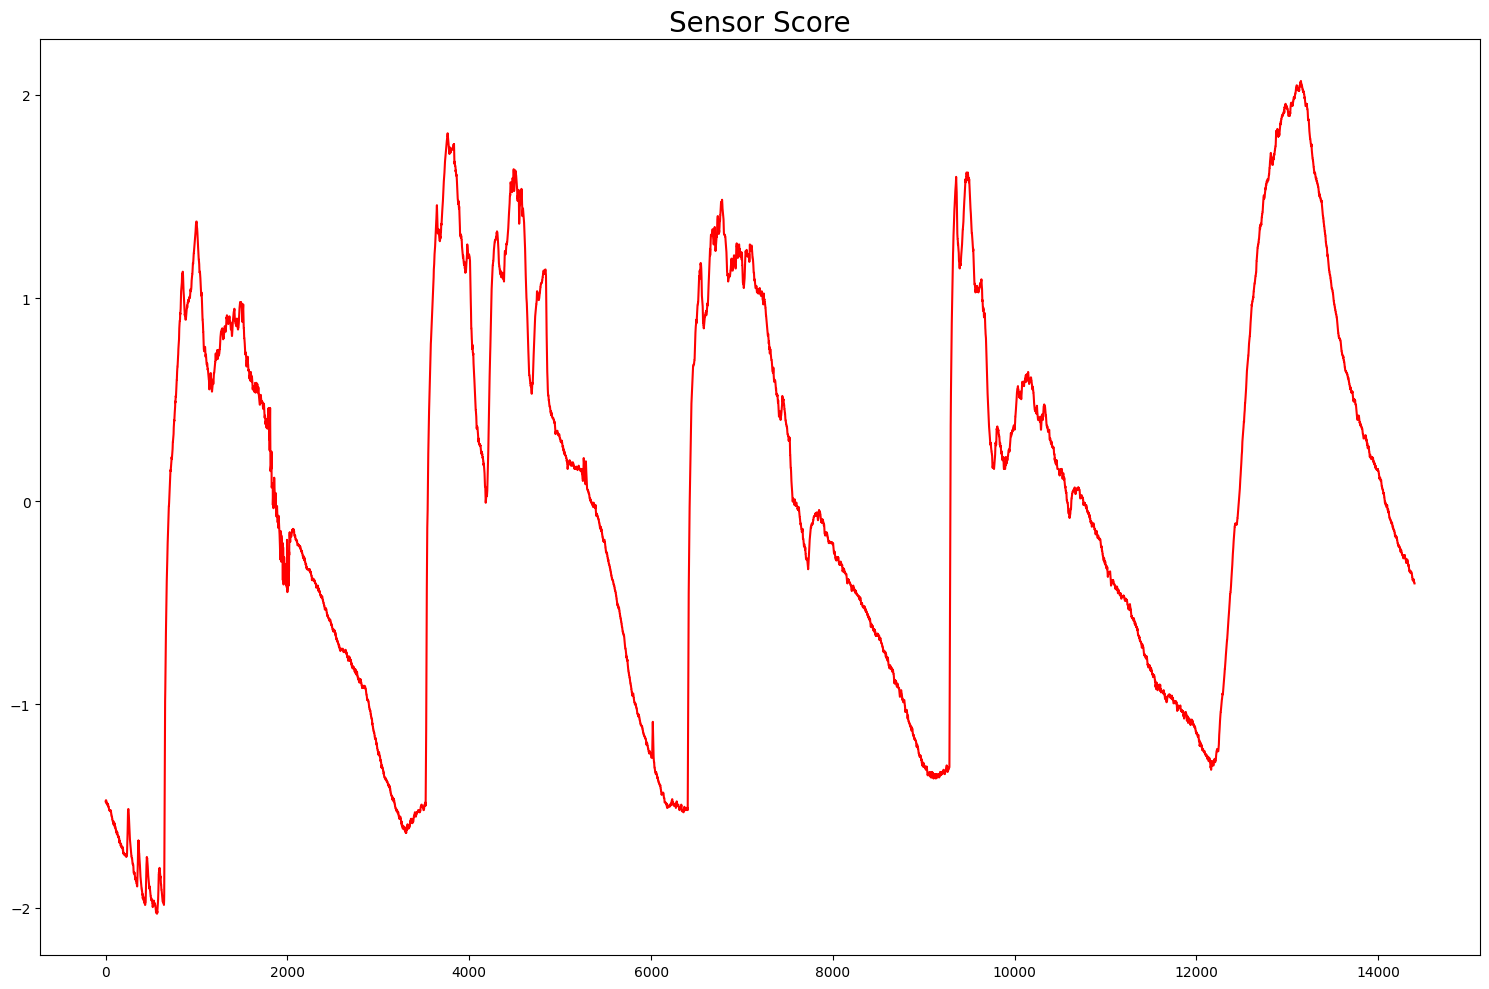

In [11]:
fig, axes = plt.subplots(nrows=1, figsize=(15,10))

axes.plot(np.array(scaled_data[:, 4]).ravel(), color='red')

axes.set_title('Sensor Score', fontsize=20)

# axes[0].grid()
# axes[1].grid()
plt.tight_layout()
plt.savefig('plt_for_1_data')
plt.show()

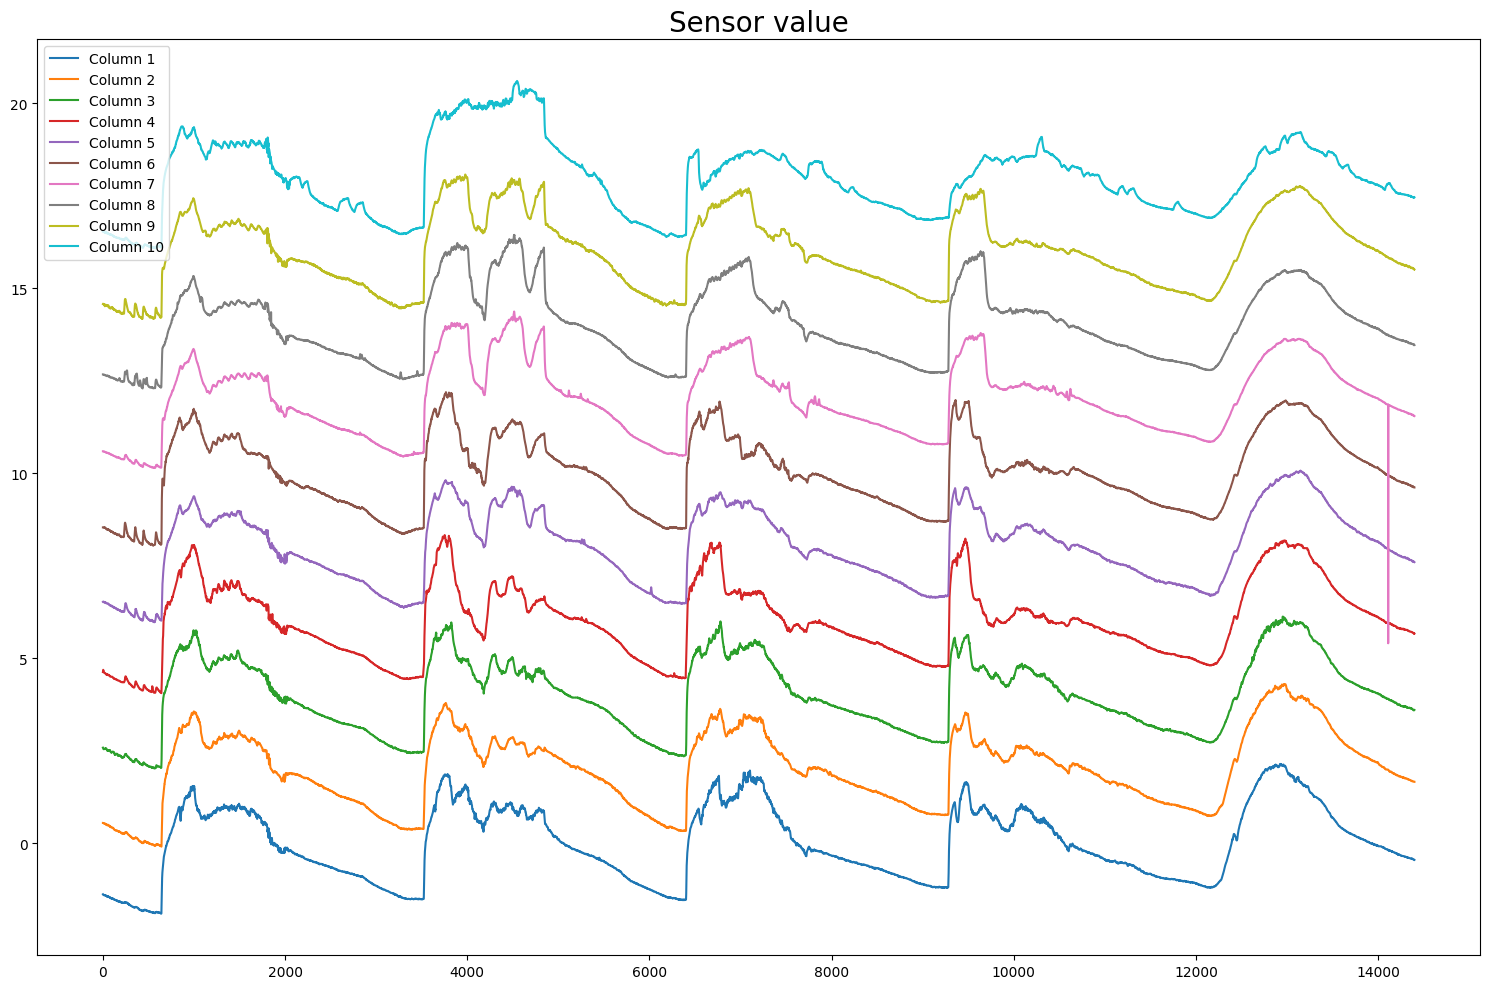

In [12]:


fig, axes = plt.subplots(nrows=1, figsize=(15, 10))

# Iterate over each column and plot them on the same axes
for i in range(10):
    offset = i * 2  # Adjust the offset as needed
    column_values = np.array(scaled_data[:, i]).ravel() + offset
    axes.plot(column_values, label=f'Column {i+1}')
axes.set_title('Sensor value', fontsize=20)
axes.legend()
plt.tight_layout()
plt.savefig('plt_for_10_sensor_data')
plt.show()

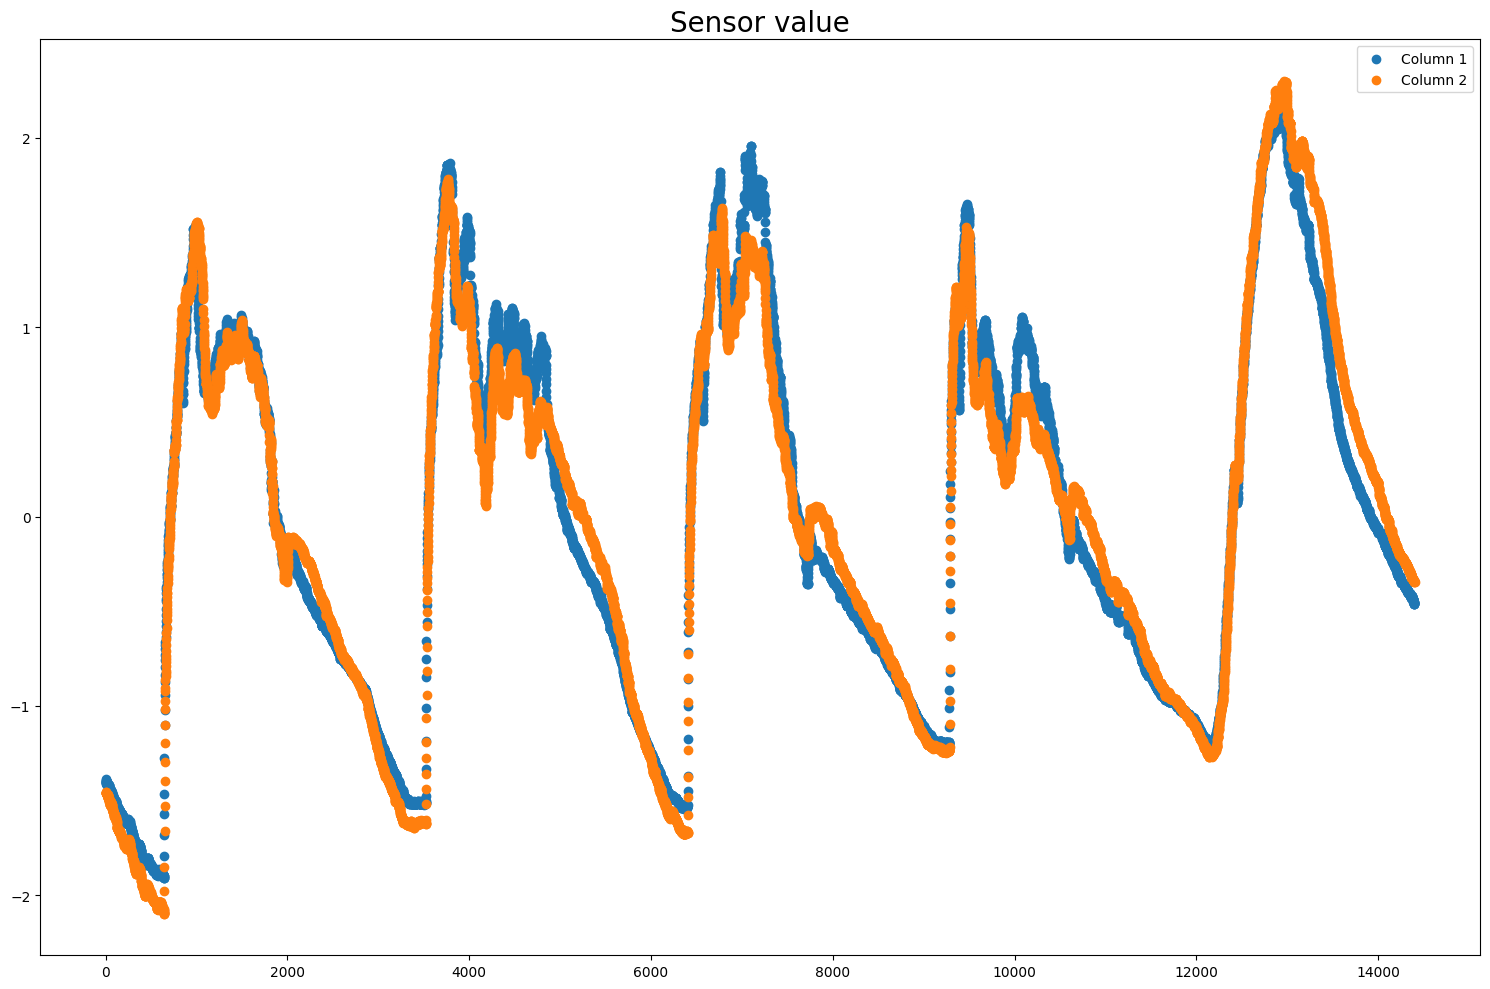

In [13]:

fig, axes = plt.subplots(nrows=1, figsize=(15, 10))

for i in range(2):
    offset = i * 2  # Adjust the offset as needed
    column_values = np.array(scaled_data[:, i]).ravel()
    x_values = np.arange(len(column_values)) + offset
    axes.scatter(x_values, column_values, label=f'Column {i+1}')

axes.set_title('Sensor value', fontsize=20)
axes.legend()
plt.tight_layout()

plt.show()

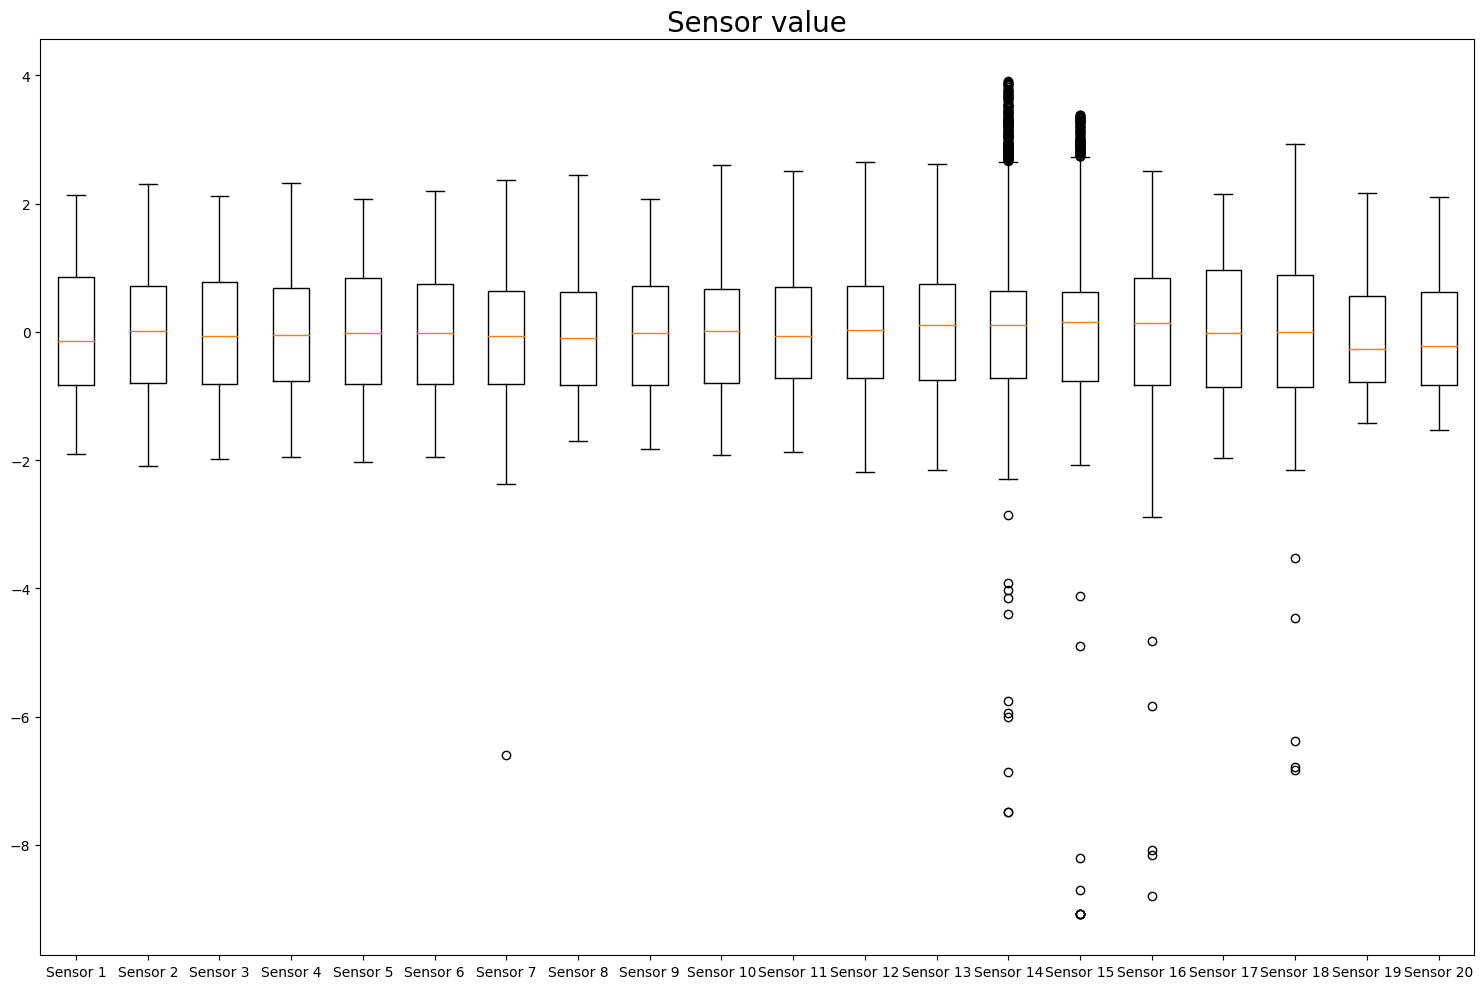

In [14]:
fig, axes = plt.subplots(nrows=1, figsize=(15, 10))

data = []

for i in range(20):
    offset = i * 2  # Adjust the offset as needed
    column_values = np.array(scaled_data[:, i]).ravel()
    data.append(column_values)

axes.boxplot(data, labels=[f'Sensor {i+1}' for i in range(20)])

axes.set_title('Sensor value', fontsize=20)
plt.tight_layout()
plt.show()

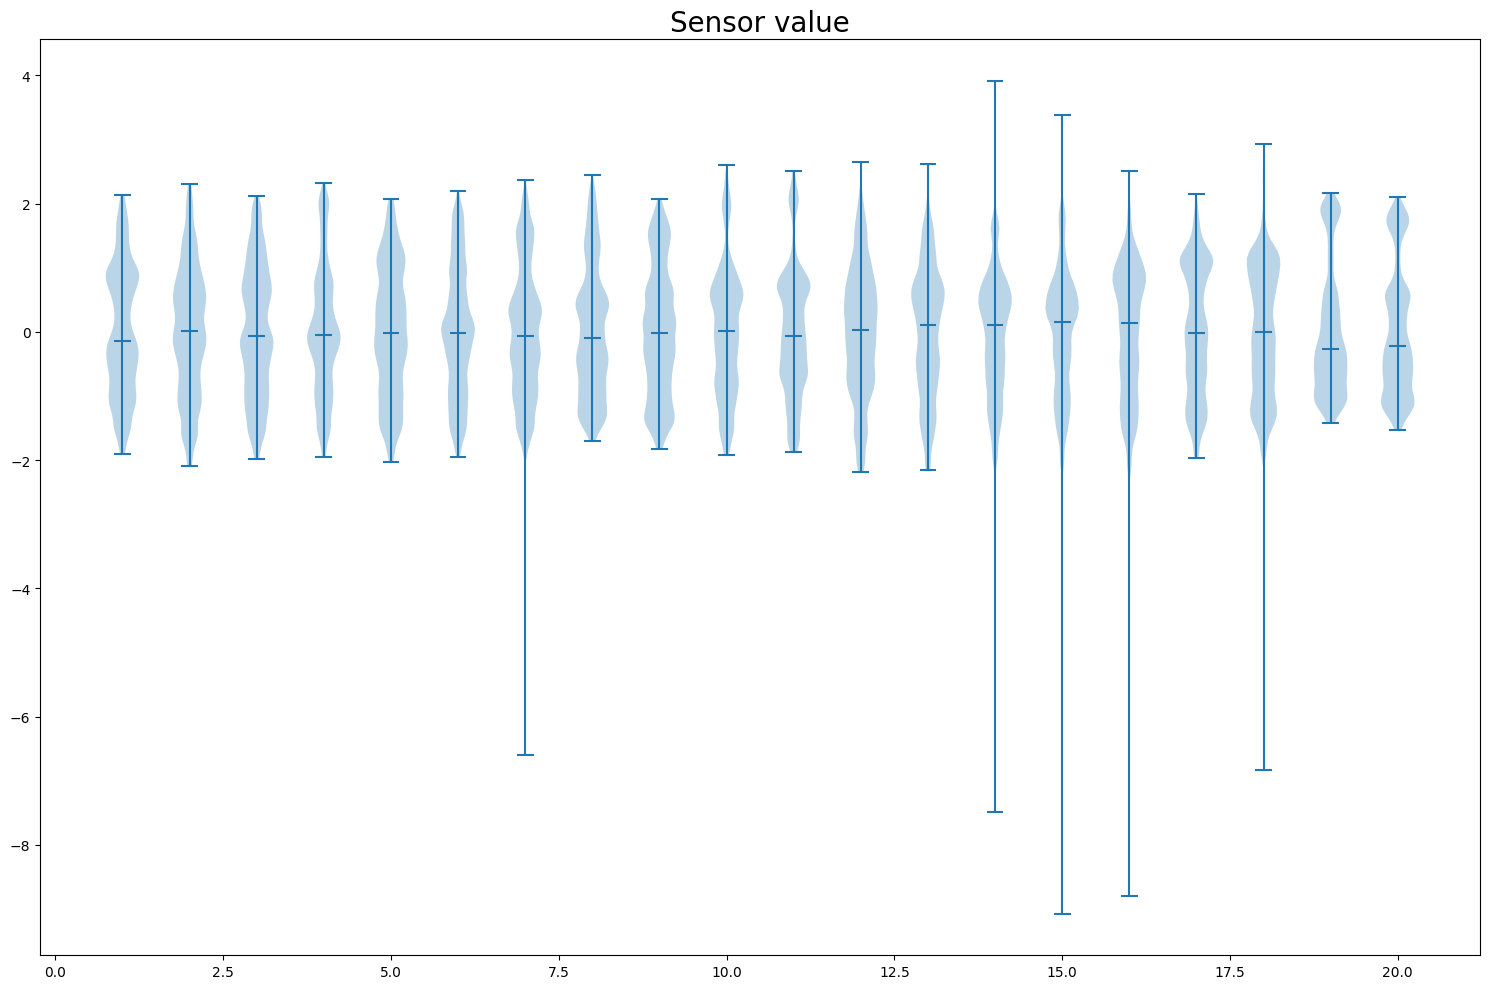

In [15]:
fig, axes = plt.subplots(nrows=1, figsize=(15, 10))

data = []

for i in range(20):
    offset = i * 2  # Adjust the offset as needed
    column_values = np.array(scaled_data[:, i]).ravel()
    data.append(column_values)

axes.violinplot(data, showmedians=True)

axes.set_title('Sensor value', fontsize=20)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.svm import OneClassSVM
import time
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

In [17]:
def send_email(subject, body):
    # Email configurations
    sender_email = "cabhishek690@gmail.com"
    receiver_email = "raunak.nmore@gmail.com"
    password = "1234sa"

    # Create message
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject
    message.attach(MIMEText(body, "plain"))

    # Send email
    with smtplib.SMTP_SSL("smtp.example.com", 465) as server:
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message.as_string())


In [18]:
def stream_data(data):
    for row in data:
        yield row
        time.sleep(1)


In [19]:
len(scaled_data)

14400

In [20]:
train_size = int(0.8 * len(scaled_data))
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

In [21]:
train_data

array([[-1.38628352, -1.45578614, -1.42155828, ..., -1.8719126 ,
        -1.82155629, -1.763413  ],
       [-1.39033902, -1.45578614, -1.43061286, ..., -1.87569394,
        -1.82155629, -1.76698283],
       [-1.39439452, -1.46099587, -1.43514015, ..., -1.87947528,
        -1.82155629, -1.77055265],
       ...,
       [-0.8590689 , -0.79936139, -0.84659249, ..., -0.46903594,
        -0.42203209, -0.41044855],
       [-0.8590689 , -0.78894195, -0.85111978, ..., -0.47281728,
        -0.42203209, -0.41044855],
       [-0.8590689 , -0.78894195, -0.8420652 , ..., -0.47281728,
        -0.42203209, -0.41044855]])

In [22]:
pipeline_if = Pipeline([
    ("model", IsolationForest(contamination=0.05, random_state=42))  # Define the Isolation Forest model
])

In [23]:
pipeline_if.fit(train_data)

Pipeline(steps=[('model',
                 IsolationForest(contamination=0.05, random_state=42))])

In [24]:
pipeline_svm = Pipeline([
    ("model", OneClassSVM(nu=0.05))  # Define the One-Class SVM model
])

# Train the model
pipeline_svm.fit(train_data)

Pipeline(steps=[('model', OneClassSVM(nu=0.05))])

In [25]:
consecutive_non_anomalies = 0  # Counter for consecutive non-anomalies
max_consecutive_non_anomalies = 10  # Maximum number of consecutive non-anomalies allowed

for data_point in stream_data(test_data):
    # Predict anomalies on the current data point
    anomaly_label = pipeline_svm.predict([data_point])[0]

    # If an anomaly is detected, send an email notification and set the flag
    if anomaly_label == -1:
        subject = "Anomaly Detected in Sensor Data"
        body = f"Anomaly Detected at Data Point: {data_point}"
        send_email(subject, body)
        print("Email notification sent. Terminating the process.")
        break  # Terminate the process if an anomaly is detected
    else:
        print("No anomalies detected at Data Point:", data_point)
        consecutive_non_anomalies += 1

        # Check if the maximum consecutive non-anomalies threshold is reached
        if consecutive_non_anomalies >= max_consecutive_non_anomalies:
            print("Maximum consecutive non-anomalies reached. Terminating the process.")
            break

# If no anomaly is detected, print a message
if consecutive_non_anomalies < max_consecutive_non_anomalies:
    print("No anomalies detected in the entire dataset.")


No anomalies detected at Data Point: [-0.8631244  -0.78894195 -0.83753791 -0.74130806 -0.84955114 -0.79876308
 -0.7672418  -0.85307183 -0.90488108 -0.74909939 -0.67132539 -0.58828218
 -0.74805686 -0.71322223 -0.8361455  -0.91565635 -0.9872969  -1.0133208
 -0.85303817 -0.96470234 -0.91556851 -0.97668679 -0.96416196 -1.0230868
 -1.05541923 -1.04806673 -1.03315466 -1.02326319 -0.94805922 -0.95867697
 -0.89718294 -0.78196238 -0.7309166  -0.80330895 -0.79321358 -0.82610227
 -0.80348548 -0.84725548 -0.9277473  -0.95590703 -0.96206797 -0.789412
 -0.72817519 -0.61857363 -0.60884426 -0.50389958 -0.58844445 -0.57886194
 -0.39126556 -0.47281728 -0.42564843 -0.41044855]
No anomalies detected at Data Point: [-0.8671799  -0.78894195 -0.83301062 -0.74635373 -0.86027745 -0.80934529
 -0.7672418  -0.84879114 -0.89995367 -0.74909939 -0.66790069 -0.58828218
 -0.75217099 -0.71322223 -0.8361455  -0.91565635 -0.9872969  -1.01647515
 -0.85303817 -0.96470234 -0.95766203 -0.98056357 -0.96596424 -1.0230868
 -1.0

In [26]:
consecutive_non_anomalies = 0  # Counter for consecutive non-anomalies
max_consecutive_non_anomalies = 10  # Maximum number of consecutive non-anomalies allowed

for data_point in stream_data(test_data):
    # Predict anomalies on the current data point
    anomaly_label = pipeline_if.predict([data_point])[0]

    # If an anomaly is detected, send an email notification and set the flag
    if anomaly_label == -1:
        subject = "Anomaly Detected in Sensor Data"
        body = f"Anomaly Detected at Data Point: {data_point}"
        send_email(subject, body)
        print("Email notification sent. Terminating the process.")
        break  # Terminate the process if an anomaly is detected
    else:
        print("No anomalies detected at Data Point:", data_point)
        consecutive_non_anomalies += 1

        # Check if the maximum consecutive non-anomalies threshold is reached
        if consecutive_non_anomalies >= max_consecutive_non_anomalies:
            print("Maximum consecutive non-anomalies reached. Terminating the process.")
            break

# If no anomaly is detected, print a message
if consecutive_non_anomalies < max_consecutive_non_anomalies:
    print("No anomalies detected in the entire dataset.")


No anomalies detected at Data Point: [-0.8631244  -0.78894195 -0.83753791 -0.74130806 -0.84955114 -0.79876308
 -0.7672418  -0.85307183 -0.90488108 -0.74909939 -0.67132539 -0.58828218
 -0.74805686 -0.71322223 -0.8361455  -0.91565635 -0.9872969  -1.0133208
 -0.85303817 -0.96470234 -0.91556851 -0.97668679 -0.96416196 -1.0230868
 -1.05541923 -1.04806673 -1.03315466 -1.02326319 -0.94805922 -0.95867697
 -0.89718294 -0.78196238 -0.7309166  -0.80330895 -0.79321358 -0.82610227
 -0.80348548 -0.84725548 -0.9277473  -0.95590703 -0.96206797 -0.789412
 -0.72817519 -0.61857363 -0.60884426 -0.50389958 -0.58844445 -0.57886194
 -0.39126556 -0.47281728 -0.42564843 -0.41044855]
No anomalies detected at Data Point: [-0.8671799  -0.78894195 -0.83301062 -0.74635373 -0.86027745 -0.80934529
 -0.7672418  -0.84879114 -0.89995367 -0.74909939 -0.66790069 -0.58828218
 -0.75217099 -0.71322223 -0.8361455  -0.91565635 -0.9872969  -1.01647515
 -0.85303817 -0.96470234 -0.95766203 -0.98056357 -0.96596424 -1.0230868
 -1.0

# By using PCA

In [27]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

In [32]:

# Define the pipeline with PCA and Isolation Forest model
pipeline = Pipeline([
    
    ("pca", PCA(n_components=0.95)),  # Retain 95% of variance
    ("model", IsolationForest(contamination=0.05, random_state=42))
])

In [33]:
pipeline.fit(train_data)


Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('model',
                 IsolationForest(contamination=0.05, random_state=42))])

In [36]:
consecutive_non_anomalies = 0  # Counter for consecutive non-anomalies
max_consecutive_non_anomalies = 10  # Maximum number of consecutive non-anomalies allowed

for data_point in stream_data(test_data):
    # Predict anomalies on the current data point
    anomaly_label = pipeline.predict([data_point])[0]

    # If an anomaly is detected, send an email notification and set the flag
    if anomaly_label == -1:
        subject = "Anomaly Detected in Sensor Data"
        body = f"Anomaly Detected at Data Point: {data_point}"
        send_email(subject, body)
        print("Email notification sent. Terminating the process.")
        break  # Terminate the process if an anomaly is detected
    else:
        print("No anomalies detected at Data Point:", data_point)
        consecutive_non_anomalies += 1

        # Check if the maximum consecutive non-anomalies threshold is reached
        if consecutive_non_anomalies >= max_consecutive_non_anomalies:
            print("Maximum consecutive non-anomalies reached. Terminating the process.")
            break

# If no anomaly is detected, print a message
if consecutive_non_anomalies < max_consecutive_non_anomalies:
    print("No anomalies detected in the entire dataset.")

No anomalies detected at Data Point: [-0.8631244  -0.78894195 -0.83753791 -0.74130806 -0.84955114 -0.79876308
 -0.7672418  -0.85307183 -0.90488108 -0.74909939 -0.67132539 -0.58828218
 -0.74805686 -0.71322223 -0.8361455  -0.91565635 -0.9872969  -1.0133208
 -0.85303817 -0.96470234 -0.91556851 -0.97668679 -0.96416196 -1.0230868
 -1.05541923 -1.04806673 -1.03315466 -1.02326319 -0.94805922 -0.95867697
 -0.89718294 -0.78196238 -0.7309166  -0.80330895 -0.79321358 -0.82610227
 -0.80348548 -0.84725548 -0.9277473  -0.95590703 -0.96206797 -0.789412
 -0.72817519 -0.61857363 -0.60884426 -0.50389958 -0.58844445 -0.57886194
 -0.39126556 -0.47281728 -0.42564843 -0.41044855]
No anomalies detected at Data Point: [-0.8671799  -0.78894195 -0.83301062 -0.74635373 -0.86027745 -0.80934529
 -0.7672418  -0.84879114 -0.89995367 -0.74909939 -0.66790069 -0.58828218
 -0.75217099 -0.71322223 -0.8361455  -0.91565635 -0.9872969  -1.01647515
 -0.85303817 -0.96470234 -0.95766203 -0.98056357 -0.96596424 -1.0230868
 -1.0